In [1]:
import numpy as np
import pandas as pd
import pydataset

In [11]:
df = pd.DataFrame({'sex': [1, 2, 1, 3, 2, 1],
                   'score': [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [4]:
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [6]:
df.score.value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

### 이상치 => 결측치 => 삭제/평균으로 대체

In [13]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [8]:
df['score'] = np.where(df.score == 6, np.nan, df.score)

In [9]:
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [12]:
df['score'] = np.where(df.score > 5, np.nan, df.score)
df

,sex,score
0,1,5.0
1,2,4.0
2,1,3.0
3,3,4.0
4,2,2.0
5,1,NaN


In [14]:
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [16]:
df.dropna(subset = ['sex', 'score'])

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
4,2.0,2.0


In [21]:
df.dropna(subset = ['sex', 'score'])\
    .groupby('sex')\
    .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


0    NaN
1    4.0
2    3.0
3    4.0
4    2.0
5    NaN
Name: score, dtype: float64

In [24]:
df = pd.DataFrame({'sex': [1, 2, 1, 3, 2, 1],
                   'score': [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [28]:
df['sex'] = df.sex.replace({1:'male', 2:'female'})

In [31]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df.sex)

In [37]:
mpg = pydataset.data('mpg')

In [39]:
import seaborn as sns

<AxesSubplot:ylabel='hwy'>

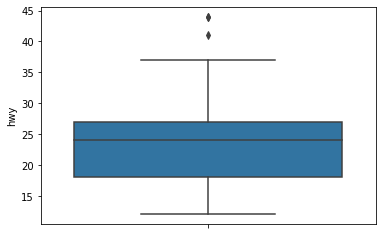

In [40]:
sns.boxplot(data = mpg, y = 'hwy')

In [41]:
pct25 = mpg.hwy.quantile(.25)
pct25

18.0

In [42]:
pct75 = mpg.hwy.quantile(.75)

In [43]:
pct75

27.0

In [44]:
iqr = pct75 - pct25

In [45]:
iqr

9.0

# 상한: 3분위수보다 IQR * 1.5보다 큰 값
# 하한: 1분위수보다 IQR * 1.5보다 작은 값

In [46]:
pct25 - 1.5 * iqr

4.5

In [47]:
pct75 + 1.5 * iqr

40.5

In [49]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), 
                      np.nan, mpg['hwy'])

In [52]:
mpg.hwy.isna().sum()

3

In [ ]:
mpg.drop